In [ ]:
#https://github.com/edbullen/nltk/blob/master/corpora.ipynb

In [1]:
import nltk
nltk.download("reuters")

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...


True

In [2]:
nltk.download('punkt')   # Punkt Tokenizer Model
nltk.download('averaged_perceptron_tagger')  # Part-of-Speech Tokeniser
nltk.download("stopwords") # Stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
from nltk.corpus import reuters
categories = reuters.categories()
print("Number of Categories:",len(categories))
print(categories[0:9],categories[-10:])

Number of Categories: 90
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil'] ['sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [4]:
words = reuters.words()
print("number of words", len(words) )
print("first 10 words:", words[0:9])

number of words 1720901
first 10 words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-']


In [5]:
# Filter Text by Category Extract at a sepecific category
tradeWords = reuters.words(categories = 'trade')
len(tradeWords)

142723

In [6]:
#Remove Stopwords and Punctuation
from nltk.corpus import stopwords
import string
print(stopwords.words('english'))

# This takes a couple of minutes to run
tradeWords = [w for w in tradeWords if w.lower() not in stopwords.words('english') ]

tradeWords = [w for w in tradeWords if w not in string.punctuation]
punctCombo = [c+"\"" for c in string.punctuation ]+ ["\""+c for c in string.punctuation ]
tradeWords = [w for w in tradeWords if w not in punctCombo]
len(tradeWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

78019

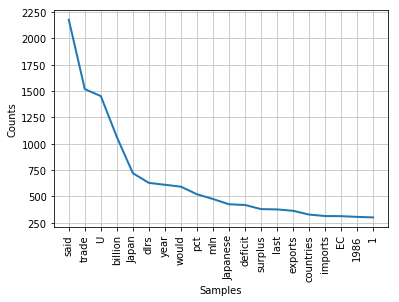

said 2177
trade 1518
U 1452
billion 1063
Japan 720
dlrs 628
year 610
would 592
pct 520
mln 475


In [7]:
#Word Frequency Distribution
fdist = nltk.FreqDist(tradeWords)
fdist.plot(20, cumulative=False)
# (installed Ghostscript on my PC to get this working in Jupyter
for word, frequency in fdist.most_common(10):
    print(word, frequency)

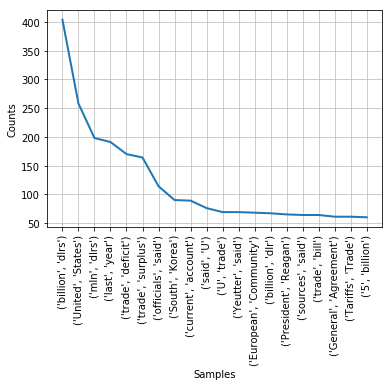

In [8]:
biTradeWords = nltk.bigrams(tradeWords)
biFdist = nltk.FreqDist(biTradeWords)
biFdist.plot(20, cumulative=False)

In [10]:
nltk.download('treebank')

from nltk.corpus import treebank

words = treebank.words()
tagged = treebank.tagged_words()
print(type(tagged))
print("Word Count", len(words))
print("Tagged words sample: ",tagged[0:9])

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.
<class 'nltk.corpus.reader.util.ConcatenatedCorpusView'>
Word Count 100676
Tagged words sample:  [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB')]


In [12]:
parsed = treebank.parsed_sents()[0]

print(parsed)

type(parsed)



(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


nltk.tree.Tree

In [17]:
import IPython
IPython.core.display(parsed)

TypeError: 'module' object is not callable

In [ ]:
#Sentence Tokenisation

In [21]:
import  nltk

ulysses = "Mrkgnao! the cat said loudly. She blinked up out of her avid shameclosing eyes, mewing \
plaintively and long, showing him her milkwhite teeth. He watched the dark eyeslits narrowing \
with greed till her eyes were green stones. Then he went to the dresser, took the jug Hanlon's\
milkman had just filled for him, poured warmbubbled milk on a saucer and set it slowly on the floor.\
— Gurrhr! she cried, running to lap."

doc = nltk.sent_tokenize(ulysses)
for s in doc:
    print(">",s)

> Mrkgnao!
> the cat said loudly.
> She blinked up out of her avid shameclosing eyes, mewing plaintively and long, showing him her milkwhite teeth.
> He watched the dark eyeslits narrowing with greed till her eyes were green stones.
> Then he went to the dresser, took the jug Hanlon'smilkman had just filled for him, poured warmbubbled milk on a saucer and set it slowly on the floor.— Gurrhr!
> she cried, running to lap.


In [22]:
from nltk import word_tokenize

sentence = "Mary had a little lamb it's fleece was white as snow."
# Default Tokenisation
tree_tokens = word_tokenize(sentence)   # nltk.download('punkt') for this

# Other Tokenisers
punct_tokenizer = nltk.tokenize.WordPunctTokenizer()
punct_tokens = punct_tokenizer.tokenize(sentence)

space_tokenizer = nltk.tokenize.SpaceTokenizer()
space_tokens = space_tokenizer.tokenize(sentence)

print("DEFAULT: ", tree_tokens)
print("PUNCT  : ", punct_tokens)
print("SPACE  : ", space_tokens)

DEFAULT:  ['Mary', 'had', 'a', 'little', 'lamb', 'it', "'s", 'fleece', 'was', 'white', 'as', 'snow', '.']
PUNCT  :  ['Mary', 'had', 'a', 'little', 'lamb', 'it', "'", 's', 'fleece', 'was', 'white', 'as', 'snow', '.']
SPACE  :  ['Mary', 'had', 'a', 'little', 'lamb', "it's", 'fleece', 'was', 'white', 'as', 'snow.']


In [23]:
pos = nltk.pos_tag(tree_tokens)
print(pos)
pos_space = nltk.pos_tag(space_tokens)
print(pos_space)

[('Mary', 'NNP'), ('had', 'VBD'), ('a', 'DT'), ('little', 'JJ'), ('lamb', 'NN'), ('it', 'PRP'), ("'s", 'VBZ'), ('fleece', 'NN'), ('was', 'VBD'), ('white', 'JJ'), ('as', 'IN'), ('snow', 'NN'), ('.', '.')]
[('Mary', 'NNP'), ('had', 'VBD'), ('a', 'DT'), ('little', 'JJ'), ('lamb', 'JJ'), ("it's", 'NN'), ('fleece', 'NN'), ('was', 'VBD'), ('white', 'JJ'), ('as', 'IN'), ('snow.', 'NN')]


In [24]:
import re
regex = re.compile("^N.*")
nouns = []
for l in pos:
    if regex.match(l[1]):
        nouns.append(l[0])
print("Nouns:", nouns)

Nouns: ['Mary', 'lamb', 'fleece', 'snow']


In [25]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer("english")

print([porter.stem(t) for t in tree_tokens])
print([lancaster.stem(t) for t in tree_tokens])
print([snowball.stem(t) for t in tree_tokens])

sentence2 = "When I was going into the woods I saw a bear lying asleep on the forest floor"
tokens2 = word_tokenize(sentence2)

print("\n",sentence2)
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens2])

['mari', 'had', 'a', 'littl', 'lamb', 'it', "'s", 'fleec', 'wa', 'white', 'as', 'snow', '.']
['mary', 'had', 'a', 'littl', 'lamb', 'it', "'s", 'fleec', 'was', 'whit', 'as', 'snow', '.']
['mari', 'had', 'a', 'littl', 'lamb', 'it', "'s", 'fleec', 'was', 'white', 'as', 'snow', '.']

 When I was going into the woods I saw a bear lying asleep on the forest floor
['when', 'I', 'wa', 'go', 'into', 'the', 'wood', 'I', 'saw', 'a', 'bear', 'lie', 'asleep', 'on', 'the', 'forest', 'floor']
['when', 'i', 'was', 'going', 'into', 'the', 'wood', 'i', 'saw', 'a', 'bear', 'lying', 'asleep', 'on', 'the', 'forest', 'flo']
['when', 'i', 'was', 'go', 'into', 'the', 'wood', 'i', 'saw', 'a', 'bear', 'lie', 'asleep', 'on', 'the', 'forest', 'floor']


In [26]:
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

wnl = nltk.WordNetLemmatizer()
tokens2_pos = nltk.pos_tag(tokens2)  #nltk.download("averaged_perceptron_tagger")

print([wnl.lemmatize(t) for t in tree_tokens])

print([wnl.lemmatize(t) for t in tokens2])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
['Mary', 'had', 'a', 'little', 'lamb', 'it', "'s", 'fleece', 'wa', 'white', 'a', 'snow', '.']
['When', 'I', 'wa', 'going', 'into', 'the', 'wood', 'I', 'saw', 'a', 'bear', 'lying', 'asleep', 'on', 'the', 'forest', 'floor']


In [27]:
#NLTK Grammar Parsing

In [28]:
import nltk
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sentence = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
i=0
for tree in parser.parse(sentence):
    i=i+1
    print("Tree", i)
    print(tree)

Tree 1
(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
Tree 2
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [29]:
#tree.draw()  # alternative NLTK native method
import IPython
IPython.core.display.display(tree)
# (installed Ghostscript on my PC to get this working in Jupyter)

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [Tree('NP', ['I']), Tree('VP', [Tree('V', ['shot']), Tree('NP', [Tree('Det', ['an']), Tree('N', ['elephant']), Tree('PP', [Tree('P', ['in']), Tree('NP', [Tree('Det', ['my']), Tree('N', ['pajamas'])])])])])])

In [49]:
import os
from nltk.parse.stanford import StanfordDependencyParser
path = 'C:\\Users\\123\\Downloads\\stanford-corenlp-full-2018-02-27\\'   # Set this to where you have downloaded the JAR file to
path_to_jar = path + 'stanford-corenlp-3.9.1.jar'
path_to_models_jar = path + 'stanford-corenlp-3.9.1-models.jar'

dependency_parser = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models_jar)
os.environ['JAVAHOME'] = 'C:/Program Files/Java/jre1.8.0_171/bin'  # Set this to where the JDK is

In [50]:
result = dependency_parser.raw_parse('I shot an elephant in my pajamas')
dep = next(result)  # get next item from the iterator result
for t in dep.triples():
    print(t)

(('shot', 'VBD'), 'nsubj', ('I', 'PRP'))
(('shot', 'VBD'), 'dobj', ('elephant', 'NN'))
(('elephant', 'NN'), 'det', ('an', 'DT'))
(('shot', 'VBD'), 'nmod', ('pajamas', 'NNS'))
(('pajamas', 'NNS'), 'case', ('in', 'IN'))
(('pajamas', 'NNS'), 'nmod:poss', ('my', 'PRP$'))


In [51]:
dep.root["word"]
list(dep.tree())

['I', Tree('elephant', ['an']), Tree('pajamas', ['in', 'my'])]

In [52]:
# dep.tree().draw()  # alternative NLTK native method
import IPython
IPython.core.display.display(dep.tree())
# (installed Ghostscript on my PC to get this working in Jupyter

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('shot', ['I', Tree('elephant', ['an']), Tree('pajamas', ['in', 'my'])])

In [53]:
sentence = "He watched the dark eyeslits narrowing with greed till her eyes were green stones"
result = dependency_parser.raw_parse(sentence)
dep = next(result)
dep.root["word"]

'watched'

In [54]:
import IPython
IPython.core.display.display(dep.tree())

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('watched', ['He', Tree('narrowing', ['the', 'dark', 'eyeslits']), Tree('greed', ['with']), Tree('stones', ['till', Tree('eyes', ['her']), 'were', 'green'])])

In [55]:
sentence = "I shot an elephant while I was wearing pyjamas"
result = dependency_parser.raw_parse(sentence)
dep = next(result)
print("Head Word:", dep.root["word"])
IPython.core.display.display(dep.tree())

Head Word: shot


LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('shot', ['I', Tree('elephant', ['an']), Tree('wearing', ['while', 'I', 'was', 'pyjamas'])])

In [56]:
import re
regexpSubj = re.compile(r'subj')
regexpObj = re.compile(r'obj')
regexNouns = re.compile("^N.*|^PR.*")
root = dep.root["word"]

# A random selection of sentences with different styles, domains etc
sentences = ["He watched the dark eyeslits narrowing with greed till her eyes were green stones",
             "When will the Oracle 12.2 database be released?",
             "Coherence is an in-memory grid cluster for Java code",
             "Oracle 12.2 will be released in March 2017",
             "PyData community gathers to discuss how best to apply languages and tools to continuously evolving challenges in data management, processing, analytics, and visualization.",
             "Arsenal are a football team in North London",
             "When will Arsenal ever win a match?"]

def get_compounds(triples, word):
    compound = []
    for t in triples:
        if t[0][0] == word:
            if regexNouns.search(t[2][1]):
                compound.append(t[2][0])
    return compound

for sentence in sentences:
    
    result = dependency_parser.raw_parse(sentence)
    dep = next(result)
    root = [dep.root["word"]]
    root.append(get_compounds(dep.triples(), root))
    subj = []
    obj = []
    
    for t in dep.triples():
        if regexpSubj.search(t[1]):
            subj.append(t[2][0])
            subj.append(get_compounds(dep.triples(),t[2][0]))
        if regexpObj.search(t[1]):
            obj.append(t[2][0])
            obj.append(get_compounds(dep.triples(),t[2][0]))
    print("\n",sentence)
    print("Subject:",subj, "\nTopic:", root, "\nObject:",obj)


 He watched the dark eyeslits narrowing with greed till her eyes were green stones
Subject: ['He', [], 'eyes', ['her']] 
Topic: ['watched', []] 
Object: ['narrowing', ['eyeslits']]

 When will the Oracle 12.2 database be released?
Subject: ['database', ['Oracle', '12.2']] 
Topic: ['released', []] 
Object: []

 Coherence is an in-memory grid cluster for Java code
Subject: ['Coherence', []] 
Topic: ['cluster', []] 
Object: []

 Oracle 12.2 will be released in March 2017
Subject: ['12.2', ['Oracle']] 
Topic: ['released', []] 
Object: []

 PyData community gathers to discuss how best to apply languages and tools to continuously evolving challenges in data management, processing, analytics, and visualization.
Subject: ['community', ['PyData'], 'best', []] 
Topic: ['gathers', []] 
Object: ['languages', ['tools']]

 Arsenal are a football team in North London
Subject: ['Arsenal', []] 
Topic: ['team', []] 
Object: []

 When will Arsenal ever win a match?
Subject: ['Arsenal', []] 
Topic: ['win

In [57]:
# Sentence Classification Using Machine Learning
#load 100 sentences with a classification Q/S/C
import numpy as np
import pandas as pd

CODE_LOC = 'C://Users/123/Desktop'   # !! Modify to path to "features.py" folder lcoation
DATA_LOC = 'C://Users/123/Desktop/sentences.csv'  # !! Modify this to the CSV data location

sentences = pd.read_csv(filepath_or_buffer = DATA_LOC)

In [58]:
sentences.head(10)

sentences.shape

(100, 2)

In [59]:
# Extract some patterns of PoS sequences
import nltk
from nltk import word_tokenize

list_of_triple_strings = []  # triple sequence of PoS tags
sentence = "Can a dog see in colour?"

sentenceParsed = word_tokenize(sentence)
pos_tags = nltk.pos_tag(sentenceParsed)
pos = [ i[1] for i in pos_tags ]
print("Words mapped to Part of Speech Tags:",pos_tags)
print("PoS Tags:", pos)

n = len(pos)
for i in range(0,n-3):
    t = "-".join(pos[i:i+3]) # pull out 3 list item from counter, convert to string
    list_of_triple_strings.append(t)
    
print("sequences of triples:", list_of_triple_strings)

Words mapped to Part of Speech Tags: [('Can', 'MD'), ('a', 'DT'), ('dog', 'NN'), ('see', 'NN'), ('in', 'IN'), ('colour', 'NN'), ('?', '.')]
PoS Tags: ['MD', 'DT', 'NN', 'NN', 'IN', 'NN', '.']
sequences of triples: ['MD-DT-NN', 'DT-NN-NN', 'NN-NN-IN', 'NN-IN-NN']


In [60]:
import sys
sys.path.append(CODE_LOC)  # set search path to code cloned from GitHub
import features            # bespoke "feature engineering" module

sentence = "Can a dog see in colour?"

sentence = features.strip_sentence(sentence)
print(sentence)
pos = features.get_pos(sentence)
triples = features.get_triples(pos)

print(triples)

Can a dog see in colour
['MD-DT-NN', 'DT-NN-NN', 'NN-NN-IN', 'NN-IN-NN']


In [61]:
#### Bespoke Features Generator Example - Get a Python Dictionary of Features ####
sentences = ["Can a dog see in colour?",
             "Hey, How's it going?",
             "Oracle 12.2 will be released for on-premises users on 15 March 2017",
             "When will Oracle 12 be released"]
id = 1
for s in sentences:
    features_dict = features.features_dict(str(id),s)
    features_string,header = features.get_string(str(id),s)
    print(features_dict)
    #print(features_string)
    id += 1

{'id': '1', 'qMark': 1, 'wordCount': 6, 'stemmedCount': 4, 'qVerbCombo': 1, 'verbBeforeNoun': 1, 'VBG': 0, 'VBZ': 0, 'NNP': 0, 'NN': 3, 'NNS': 0, 'NNPS': 0, 'PRP': 0, 'CD': 0, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 1, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 0, 'class': 'X'}
{'id': '2', 'qMark': 1, 'wordCount': 4, 'stemmedCount': 3, 'qVerbCombo': 1, 'verbBeforeNoun': 0, 'VBG': 1, 'VBZ': 0, 'NNP': 2, 'NN': 0, 'NNS': 0, 'NNPS': 0, 'PRP': 1, 'CD': 0, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 0, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 0, 'class': 'X'}
{'id': '3', 'qMark': 0, 'wordCount': 12, 'stemmedCount': 8, 'qVerbCombo': 1, 'verbBeforeNoun': 0, 'VBG': 0, 'VBZ': 0, 'NNP': 1, 'NN': 1, 'NNS': 1, 'NNPS': 0, 'PRP': 0, 'CD': 3, 'stemmedEndNN': 0, 'startTuple0': 0, 'endTuple0': 0, 'endTuple1': 0, 'endTuple2': 0, 'qTripleScore': 0, 'sTripleScore': 2, 'class': 'X'}
{'id': '4', 'qMark': 0, 'wordCount': 6, 'stemmedCount': 4, '

In [62]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

FNAME = 'C://Users/123/Desktop/featuresDump.csv' # !! Modify this to the CSV data location

df = pd.read_csv(filepath_or_buffer = FNAME, )   
print(str(len(df)), "rows loaded")

# Strip any leading spaces from col names
df.columns = df.columns[:].str.strip()
df['class'] = df['class'].map(lambda x: x.strip())

width = df.shape[1]

100 rows loaded


In [63]:
#split into test and training (is_train: True / False col)
np.random.seed(seed=1)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
print(str(len(train)), " rows split into training set,", str(len(test)), "split into test set.")

features = df.columns[1:width-1]  #remove the first ID col and last col=classifier
print("FEATURES = {}".format(features))

77  rows split into training set, 23 split into test set.
FEATURES = Index(['wordCount', 'stemmedCount', 'stemmedEndNN', 'CD', 'NN', 'NNP', 'NNPS',
       'NNS', 'PRP', 'VBG', 'VBZ', 'startTuple0', 'endTuple0', 'endTuple1',
       'endTuple2', 'verbBeforeNoun', 'qMark', 'qVerbCombo', 'qTripleScore',
       'sTripleScore'],
      dtype='object')


In [65]:
# Fit an RF Model for "class" given features
clf = RandomForestClassifier(n_jobs=2, n_estimators = 100)
clf.fit(train[features], train['class'])
#Generate Predictions from the Test Data-Set

# Predict against test set
preds = clf.predict(test[features])
predout = pd.DataFrame({ 'id' : test['id'], 'predicted' : preds, 'actual' : test['class'] })

print(predout)

   actual                 id predicted
13      Q   31cedeb4e04fba02         Q
20      S   af7dd6b70d544b56         S
21      Q   584d5d4428d60a5f         S
24      Q   9140ee537fbe5390         Q
25      S   cabf9e317ba4a072         S
29      Q   3d25a26134f0e450         Q
32      S   280b0360e0d3ffc1         S
37      Q   0d4a13fc4cce6dab         Q
39      C   35179a54ea587953         C
40      C   8cdda20f1ae22213         C
43      Q   8798ff1fe7ac435d         Q
46      S   bc013bdd28614223         S
68      Q   7055c710336d670c         Q
70      Q   3b416352816dc854         Q
73      S   601fdf6ab85a9875         S
76      S   498b643ac17bcc7d         C
78      S   64e22039495c59bf         S
80      S   cc0c263a455bb702         S
82      C   8b1a9953c4611296         C
85      S   6b2d6039a794fb49         S
87      S   94590dd047fcbfce         S
91      Q   7a0fc645497df2c6         Q
96      S   ecef7fa7fcb25f20         S


In [66]:
## Cross-check accuracy ##
print(pd.crosstab(test['class'], preds, rownames=['actual'], colnames=['preds']))
print("\n",pd.crosstab(test['class'], preds, rownames=['actual']
                       , colnames=['preds']).apply(lambda r: round(r/r.sum()*100,2), axis=1) )

from sklearn.metrics import accuracy_score
print("\n\nAccuracy Score: ", round(accuracy_score(test['class'], preds),3) ) # https://en.wikipedia.org/wiki/Jaccard_index

preds   C  Q   S
actual          
C       3  0   0
Q       0  8   1
S       1  0  10

 preds        C      Q      S
actual                      
C       100.00   0.00   0.00
Q         0.00  88.89  11.11
S         9.09   0.00  90.91


Accuracy Score:  0.913


In [67]:
# load in some pre-formated FAQ data in a CSV
FNAME = 'C://Users/123/Desktop/pythonFAQ.csv' # !! Modify this to the CSV data location

import csv
import hashlib 

import features

fin = open(FNAME, 'rt')
reader = csv.reader(fin)

keys = ["id",
"wordCount",
"stemmedCount",
"stemmedEndNN",
"CD",
"NN",
"NNP",
"NNPS",
"NNS",
"PRP",
"VBG",
"VBZ",
"startTuple0",
"endTuple0",
"endTuple1",
"endTuple2",
"verbBeforeNoun",
"qMark",
"qVerbCombo",
"qTripleScore",
"sTripleScore",
"class"]

rows = []

next(reader)  #Assume we have a header 
for line in reader:
    sentence = line[0]  
    c = line[1]        #class-label
    id = hashlib.md5(str(sentence).encode('utf-8')).hexdigest()[:16] # generate a unique ID
    
    f = features.features_dict(id,sentence, c)
    row = []
    
    for key in keys:
        value = f[key]
        row.append(value)
    rows.append(row)
    
faq = pd.DataFrame(rows, columns=keys)
fin.close()

In [68]:
# Predict against FAQ test set
featureNames = faq.columns[1:width-1]  #remove the first ID col and last col=classifier
faqPreds = clf.predict(faq[featureNames])

predout = pd.DataFrame({ 'id' : faq['id'], 'predicted' : faqPreds, 'actual' : faq['class'] })

In [69]:
# Cross-check accuracy ##
print(pd.crosstab(faq['class'], faqPreds, rownames=['actual'], colnames=['preds']))

print("\n",pd.crosstab(faq['class'], faqPreds, rownames=['actual'],
                       colnames=['preds']).apply(lambda r: round(r/r.sum()*100,2), axis=1) )

print("Accuracy Score:", round(accuracy_score(faq['class'], faqPreds) ,3) )

preds    C   Q   S
actual            
C       12   5   2
Q        0  14   2
S        0   3  13

 preds       C      Q      S
actual                     
C       63.16  26.32  10.53
Q        0.00  87.50  12.50
S        0.00  18.75  81.25
Accuracy Score: 0.765


In [74]:
textout = {'Q': "QUESTION", 'C': "CHAT", 'S':"STATEMENT"}

mySentence = "who are you"
#mySentence = "The cat is dead"
#mySentence = "Is the cat dead"

myFeatures = features.features_dict('1',mySentence, 'X')

values=[]
for key in keys:
    values.append(myFeatures[key])

s = pd.Series(values)
width = len(s)
myFeatures = s[1:width-1]  #All but the last item (this is the class for supervised learning mode)
predict = clf.predict([myFeatures])

print("\n\nPrediction is: ", textout[predict[0].strip()])



Prediction is:  CHAT
